In [56]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="white", color_codes=True)

dataset = pd.read_csv('IRIS.csv', header=-1, names=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm','Species'])

print(dataset.head())
dataset.describe()

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm Species
0            5.1           3.5            1.4           0.2  setosa
1            4.9           3.0            1.4           0.2  setosa
2            4.7           3.2            1.3           0.2  setosa
3            4.6           3.1            1.5           0.2  setosa
4            5.0           3.6            1.4           0.2  setosa


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,100.000000,100.000000,100.000000,100.00000
mean,5.914000,3.041000,3.851000,1.21300
std,0.856469,0.439489,1.785378,0.74558
min,4.300000,2.000000,1.000000,0.10000
25%,5.175000,2.800000,1.600000,0.37500
50%,5.850000,3.000000,4.500000,1.40000
75%,6.500000,3.300000,5.100000,1.80000
max,7.900000,4.400000,6.900000,2.50000


Let's indentify how many species of flowers we have and visualize some features

In [24]:
dataset.Species.value_counts()

virginica     34
versicolor    34
setosa        32
Name: Species, dtype: int64

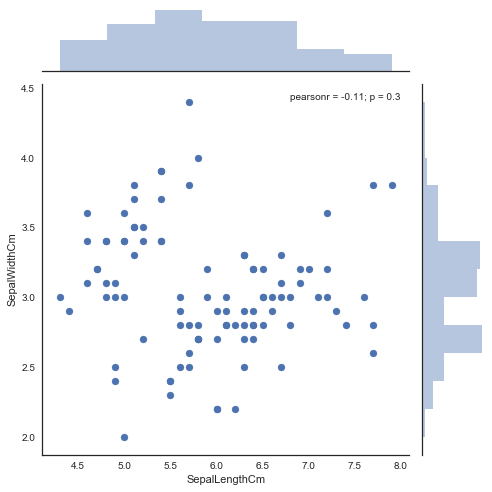

In [29]:
sns.jointplot(x="SepalLengthCm", y="SepalWidthCm", data=dataset, size=7)
#This graph allows us to see generally what sepal length and width each flower has.  We can see that there seems
#to be a gap right through the middle of the data perhaps this indicates the difference in species

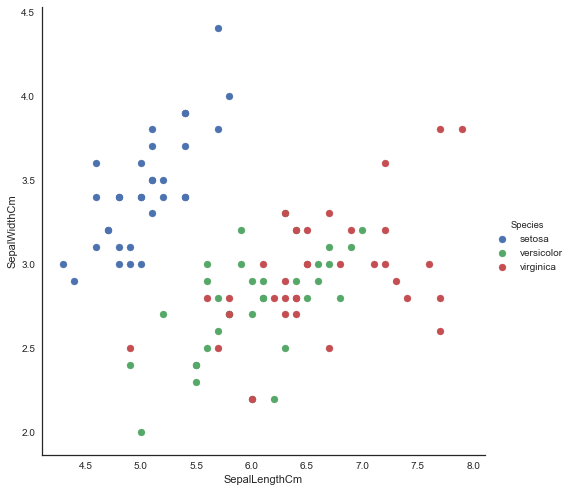

In [30]:
sns.FacetGrid(dataset, hue='Species', size=7).map(plt.scatter, 'SepalLengthCm', 'SepalWidthCm').add_legend()
#With this graph we can see that our previous hypothesis was correct,
#however versicolor and virginica are quite similar

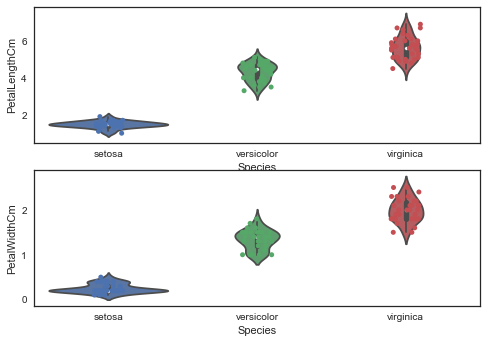

In [45]:
#Lets observe our other two features
plt.subplot(2,1,1)
sns.violinplot(x="Species", y="PetalLengthCm", data=dataset, size=7)
sns.stripplot(x="Species", y="PetalLengthCm", data=dataset, jitter=True, edgecolor="white")
plt.subplot(2,1,2)
sns.violinplot(x="Species", y="PetalWidthCm", data=dataset,size=7)
sns.stripplot(x="Species", y="PetalWidthCm", data=dataset, jitter=True, edgecolor="white")

#We can see that they each have very distinctly different petal lengths and widths

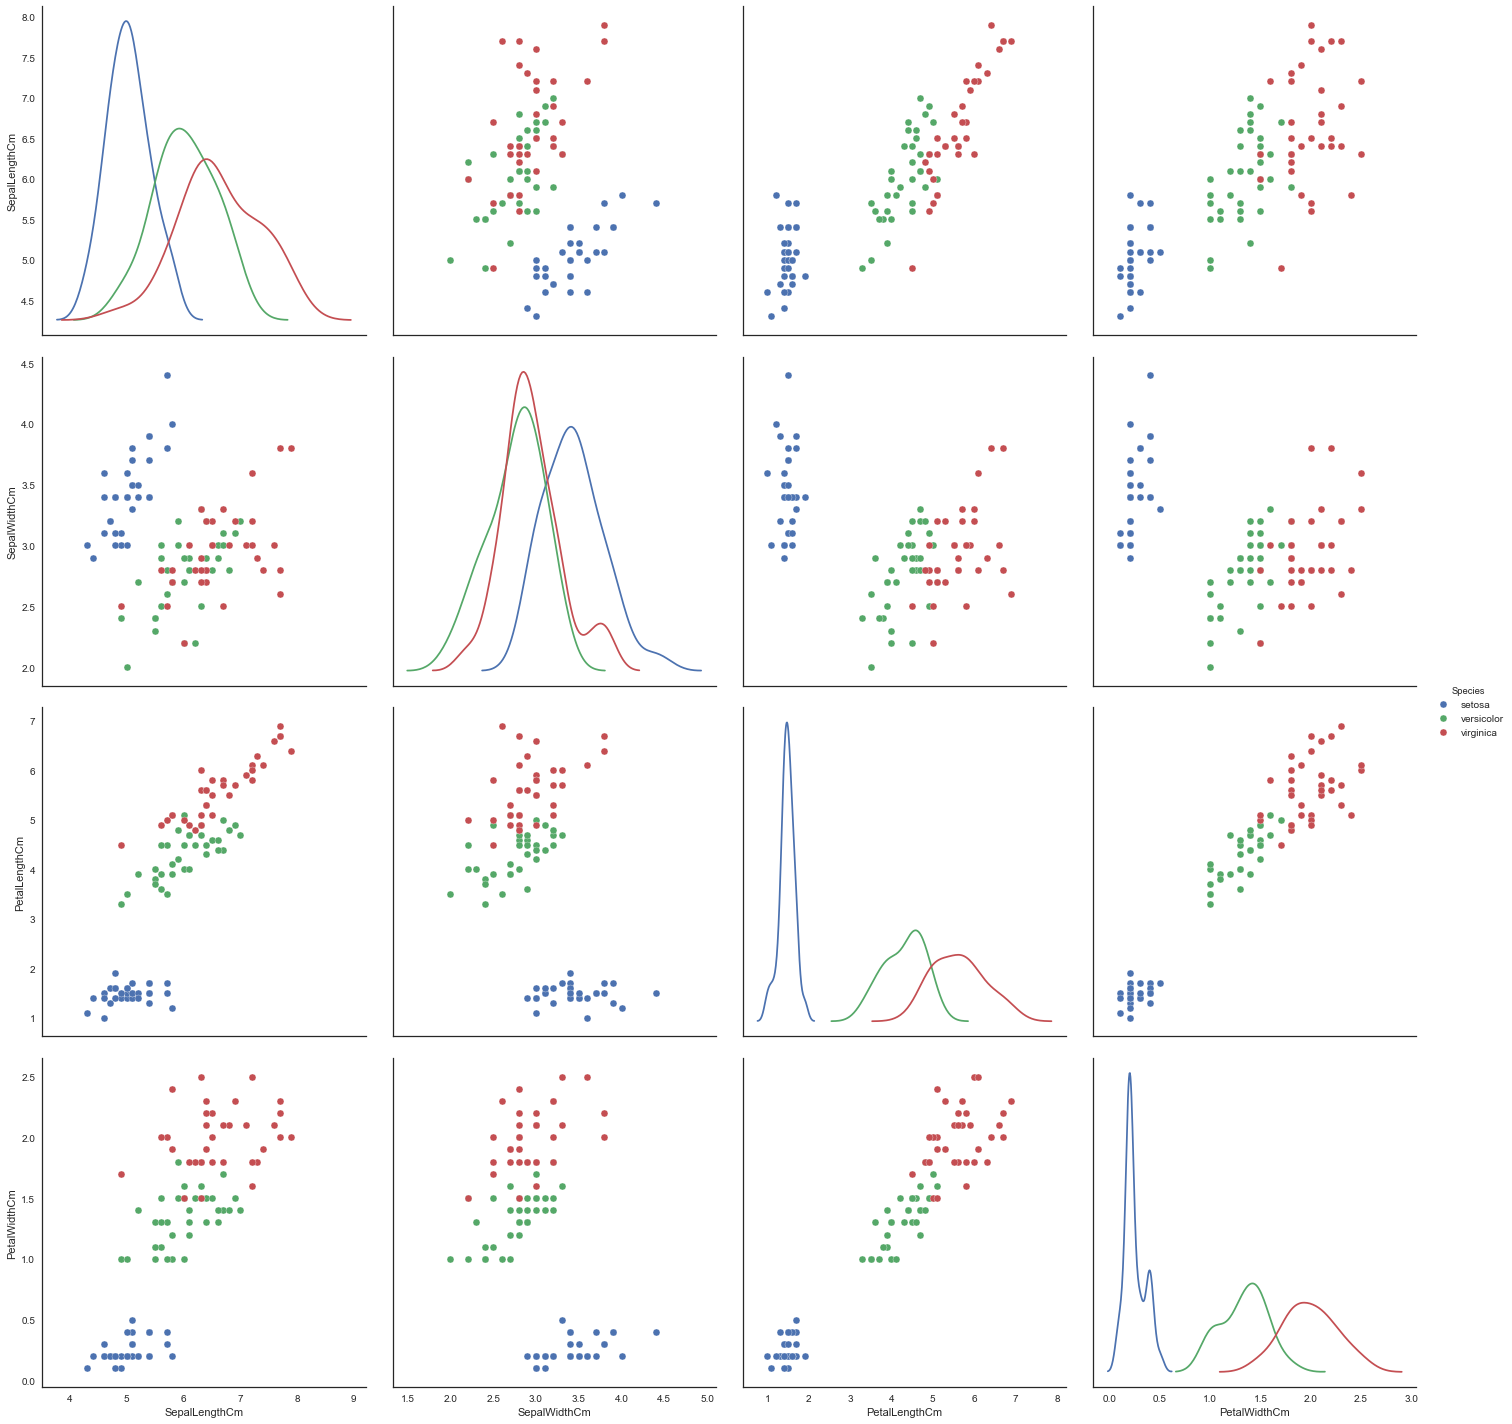

In [50]:
sns.pairplot(dataset, hue='Species', size = 5, diag_kind='kde')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11ef86cf8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11f878c18>]], dtype=object)

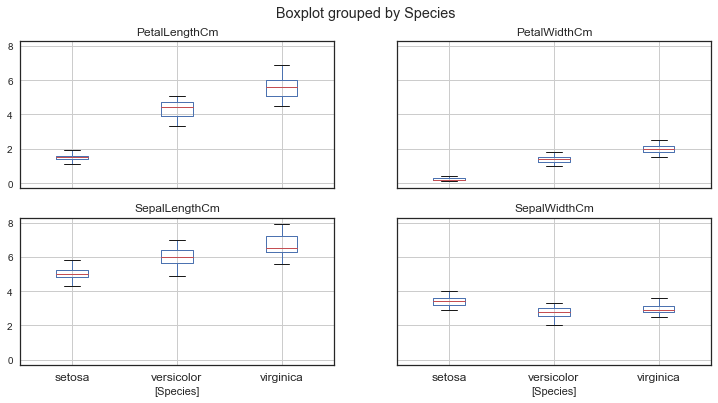

In [51]:
dataset.boxplot(by="Species", figsize=(12,6))

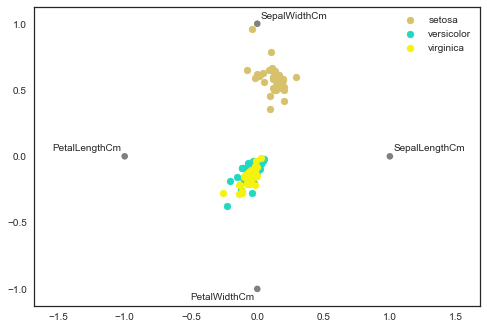

In [52]:
from pandas.tools.plotting import radviz
radviz(dataset,'Species')

In [57]:
#import the necessary machine learning algorithms and tools
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [66]:
#Split the data into a train and validation sets
array= dataset.values
#X = number values
X = array[:,0:4]
#Y = species name
Y = array[:,4]
validation_size = 0.20
seed=7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

We will use a 10-fold cross validation to estimate our accuracy when predicting.
We will split our data into 10 parts (Training on 9 and testing on 1)We will be trying 6 different algorithms to see which one gives us the best predicting power
These ae our models:
Logistic Regression (LR)
Linear Discriminant Analysis (LDA)
K-Nearest Neighbors (KNN).
Classification and Regression Trees (CART).
Gaussian Naive Bayes (NB).
Support Vector Machines (SVM).

In [86]:
#create array of models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB',GaussianNB()))
models.append(('DT',DecisionTreeClassifier()))
models.append(('SVM',SVC()))
results = []
names = []
seed=7
scoring = 'accuracy'
print("Model: Mean (Standard Deviation)")
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cross_validation_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cross_validation_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cross_validation_results.mean(), cross_validation_results.std())
    print(msg)

Model: Mean (Standard Deviation)
LR: 0.937500 (0.083853)
LDA: 0.975000 (0.050000)
KNN: 0.937500 (0.083853)
NB: 0.937500 (0.083853)
DT: 0.925000 (0.082916)
SVM: 0.962500 (0.057282)


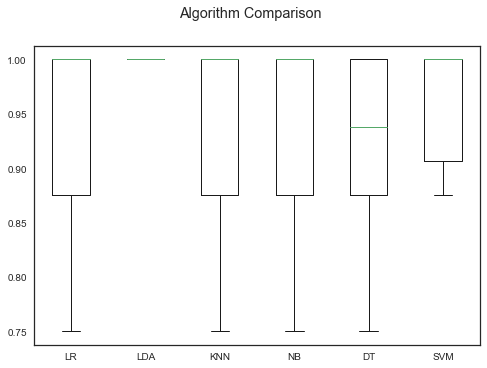

In [76]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

We can see that for LDA nearly all the predictions were achieving 100% accuracy

In [83]:
#Now we will use several of these algorithms to predict species based on the features
LDA = LinearDiscriminantAnalysis()
LDA.fit(X_train,Y_train)
predictions = LDA.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.95
[[8 0 0]
 [0 4 1]
 [0 0 7]]
             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00         8
 versicolor       1.00      0.80      0.89         5
  virginica       0.88      1.00      0.93         7

avg / total       0.96      0.95      0.95        20



In [87]:
KNN = KNeighborsClassifier()
KNN.fit(X_train,Y_train)
predictions = KNN.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

1.0
[[8 0 0]
 [0 5 0]
 [0 0 7]]
             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00         8
 versicolor       1.00      1.00      1.00         5
  virginica       1.00      1.00      1.00         7

avg / total       1.00      1.00      1.00        20



In [90]:
SVM = SVC()
SVM.fit(X_train,Y_train)
predictions = SVM.predict(X_validation)
print(accuracy_score(Y_validation,predictions))
print(confusion_matrix(Y_validation,predictions))
print(classification_report(Y_validation, predictions))

0.95
[[8 0 0]
 [0 4 1]
 [0 0 7]]
             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00         8
 versicolor       1.00      0.80      0.89         5
  virginica       0.88      1.00      0.93         7

avg / total       0.96      0.95      0.95        20



Looks like our KNN algorithm does the best.  This makes sense in that the algorithm works by classifying an item based on the points that are closest to it.  Based on our visualizations from before we saw that we could almost draw circles around the datapoint groupings to indicate species.